# This code is used to do the passive source cross-correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from html.entities import entitydefs

foldername = './Green_funs_for_different_models/'
Nmodel=4; Ns = 2526                                                                  # Number of model
Nx=501; Nz=501; dx=0.01; dz=0.01;                                                    # Mesh size and spacing  
Nt=3000; nt = Nt;  dt=0.002                                                          # Time sampling rate and sampling number

# Cross-correlation functions for passive sources

In [2]:
# Parametes used to simulate ambient noises
delta= 0.002                               # Time sampling interval (s)
hour = 2*3600                              # Recording time : 2 hour
autoc_winlen = int(hour/delta)             # Samping numbers
autoc_len    = int(6/delta)                # Time window (6 s) to calculate cross-correlation functions
nstack       = int(hour/6)                 # Stacking numbers

seis_len     = 3000

In [3]:
randomnoiseA = np.zeros((Nmodel, autoc_winlen))
randomnoiseB = np.zeros((Nmodel, autoc_winlen))

##Time consuming of random noises simulation is heavy

# for ir in range(0, int(ns)):
#     print(ir,int(ns),ir/ns)
#     ampli   = np.random.randn(autoc_winlen)

#     for im in range(0,Nmodel):
#         randomtmp   = np.convolve(ampli, GreenA[im,ir], mode='same')
#         randomnoiseA[im] = randomnoiseA[im] + randomtmp
#         randomtmp   = np.convolve(ampli, GreenB[im,ir], mode='same')
#         randomnoiseB[im] = randomnoiseB[im] + randomtmp

# np.float32(randomnoiseA).tofile('./Data/RandnoiseA'+'.dat')
# np.float32(randomnoiseB).tofile('./Data/RandnoiseB'+'.dat')  

#For efficiency you can directly read in the results with:
tmpdata = np.fromfile(foldername+'RandnoiseA'+'.dat', dtype=np.float32) 
tmpdata.shape=(Nmodel, autoc_winlen); randomnoiseA = tmpdata
tmpdata = np.fromfile(foldername+'RandnoiseB'+'.dat', dtype=np.float32) 
tmpdata.shape=(Nmodel, autoc_winlen); randomnoiseB = tmpdata

In [4]:
# Calculate cross-correlation functions and stack them together
nauto     = int(autoc_len) 
auto_allAB = np.zeros((Nmodel,nauto))

overlap_len    = int(0.05/delta)
nstack       = int(hour/0.05)
nshow        = 1200
nstmp        = int(nstack/nshow)
win_autocorr = np.zeros((Nmodel,nshow,nauto))

ifwhiten = 0
Nw_frac = 5
epsilon = 1e-10


for iv in range(0,Nmodel):
    ist=0
    for iit in range(0, nstack):
        
    #ntime stacks 
    # slice out the data within a short window
        endtime = autoc_winlen
        win_bgn = iit*overlap_len 
        win_end = win_bgn+autoc_len
        st_sliceA = randomnoiseA[iv, win_bgn:min(win_end,endtime)]
        st_sliceB = randomnoiseB[iv, win_bgn:min(win_end,endtime)]                 
        
        if endtime < win_end:
            break
             
    # perform FFT
        spA = np.fft.fft(st_sliceA)
        spB = np.fft.fft(st_sliceB)
                
    # spectral whitening, if required
        if ifwhiten == 1:
            ampA = np.abs(spA)
            ampB = np.abs(spB)
            Nw = int((autoc_len)/Nw_frac)
            amp_smA = np.convolve(ampA, np.ones(Nw)/Nw, mode='same')
            amp_smB = np.convolve(ampB, np.ones(Nw)/Nw, mode='same')
            spA = spA / (amp_smA + epsilon*max(amp_smA))
            spB = spB / (amp_smB + epsilon*max(amp_smB))
                
    # calculate crosscorrelation fun in freq domain
        auto_funfAB = (spA*np.conj(spB)) 
        auto_funtAB = np.fft.ifft(auto_funfAB)
        tempAB = auto_funtAB.real[0: nauto]
        tempAB = tempAB / max(tempAB)
        auto_allAB[iv] = auto_allAB[iv] +tempAB
        win_autocorr[iv,ist] = win_autocorr[iv,ist]+tempAB
        if ((iit+1)%nstmp == 0): 
            ist = ist+1
            if (ist>=nshow): ist=nshow-1
            print(iv, ist, iit,nstmp, nshow, nstack)
        
    auto_allAB[iv] = auto_allAB[iv]/(iit+1)
print(nstack)

0 1 119 120 1200 144000
0 2 239 120 1200 144000
0 3 359 120 1200 144000
0 4 479 120 1200 144000
0 5 599 120 1200 144000
0 6 719 120 1200 144000
0 7 839 120 1200 144000
0 8 959 120 1200 144000
0 9 1079 120 1200 144000
0 10 1199 120 1200 144000
0 11 1319 120 1200 144000
0 12 1439 120 1200 144000
0 13 1559 120 1200 144000
0 14 1679 120 1200 144000
0 15 1799 120 1200 144000
0 16 1919 120 1200 144000
0 17 2039 120 1200 144000
0 18 2159 120 1200 144000
0 19 2279 120 1200 144000
0 20 2399 120 1200 144000
0 21 2519 120 1200 144000
0 22 2639 120 1200 144000
0 23 2759 120 1200 144000
0 24 2879 120 1200 144000
0 25 2999 120 1200 144000
0 26 3119 120 1200 144000
0 27 3239 120 1200 144000
0 28 3359 120 1200 144000
0 29 3479 120 1200 144000
0 30 3599 120 1200 144000
0 31 3719 120 1200 144000
0 32 3839 120 1200 144000
0 33 3959 120 1200 144000
0 34 4079 120 1200 144000
0 35 4199 120 1200 144000
0 36 4319 120 1200 144000
0 37 4439 120 1200 144000
0 38 4559 120 1200 144000
0 39 4679 120 1200 144000
0 4

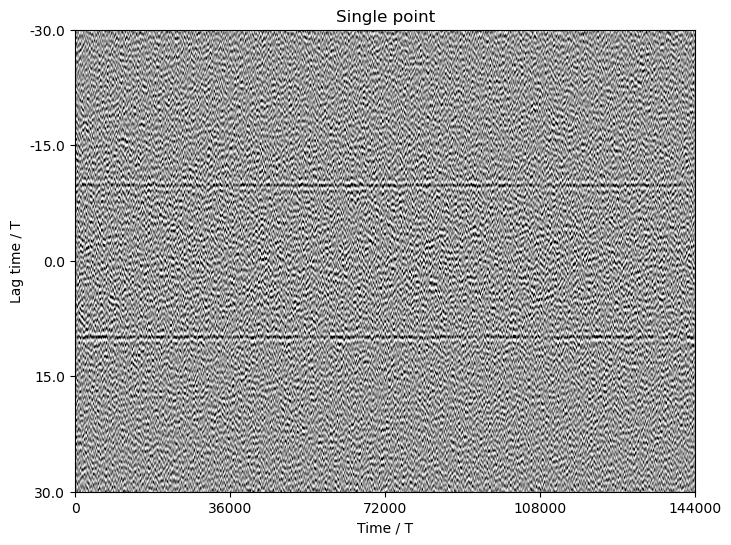

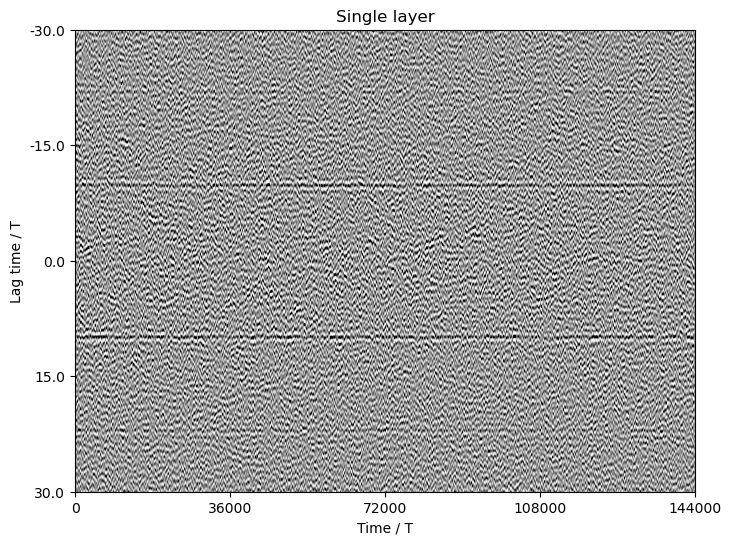

In [6]:
# Cross-correlation functions for random, uncorrelated, and continuous sources 
# recorded at different times respect to single point scatter and single planar reflecto :
# figure 5(d) and 8(d)
TT = ['Homogeneous medium', 'Single point','Single layer','Random medium']
fig_size = (8, 6)
fontsz = 14
xpos=np.arange(0,int(nshow+1))
xaxis = ['0', '36000','72000','108000','144000'] #*3600*20
ypos=np.arange(0,int(nt+1));yaxis = (np.arange(nt+1)*0.002-1.5)*20
plottmp = np.zeros((nshow,nt))
plottmp2 = np.zeros((nshow,nt))
for iv in (1,2):
    f, ax = plt.subplots(1,1, figsize=fig_size)

    plottmp[:,0:int(nt/2)] = win_autocorr[iv,:,int(nt/2):nt]
    plottmp[:,int(nt/2):nt] = win_autocorr[iv,:,0:int(nt/2)]
    for it in range(0,nt):    
        plottmp2[:,it]=plottmp[:,nt-it-1]
    ax.imshow(plottmp[:,750:2250].T/np.max(plottmp),vmin=-0.4, vmax=0.4, cmap='Greys',aspect='auto')

    ax.set_xticks(xpos[0:int(nshow+1):int(nshow/4)], labels=xaxis)
    ax.set_yticks(ypos[0:int(nt/2+1):int(nt/8)], labels=yaxis[0:int(nt/2+1):int(nt/8)])
    ax.set_xlabel('Time / T');ax.set_ylabel('Lag time / T')
    ax.set_title(TT[iv])

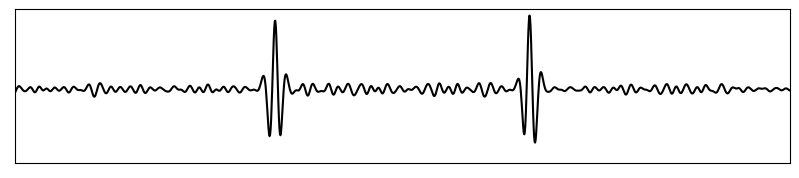

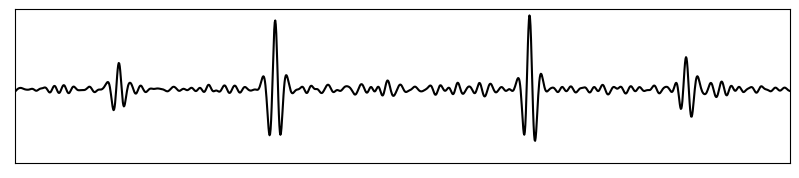

In [7]:
# The stacked cross-correlation function for single point scatter and single planar reflecto : figure 5(e) and 8(e)
Gplottmp = np.zeros([Nmodel, nt])

for iv in range(0, Nmodel):
 
    Gplottmp[iv,0:int(nt/2)] = auto_allAB[iv,int(nt/2):nt]/np.max(auto_allAB[iv])
    Gplottmp[iv,int(nt/2):nt] = auto_allAB[iv,0:int(nt/2)]/np.max(auto_allAB[iv])

fig_size = (10, 2)
fontsz = 14
ypos=np.arange(0,int(nt)+1);yaxis = (np.arange(nt+1)*0.002-1.5)*20

for iv in (1,2):
    f, ax = plt.subplots(1,1, figsize=fig_size)

    ax.plot(Gplottmp[iv,750:2250],'k') #'#F97306')

    ax.set_xticks(ypos[0:int(nt/2+1):int(nt/8)], labels=yaxis[0:int(nt/2+1):int(nt/8)])
    ax.set_yticks([1,-1], )

    ax.set_xlim(0,1500)

    plt.xticks([]);plt.yticks([])

## Actual Green’s function and the stacked cross-correlation function (XCF) in different media

0 0
0 1
3 0
3 1


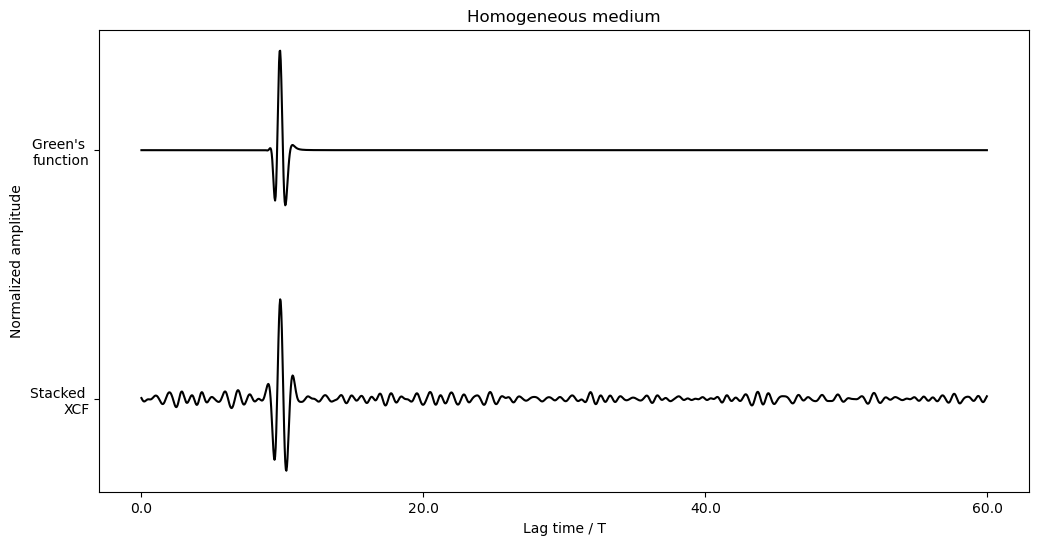

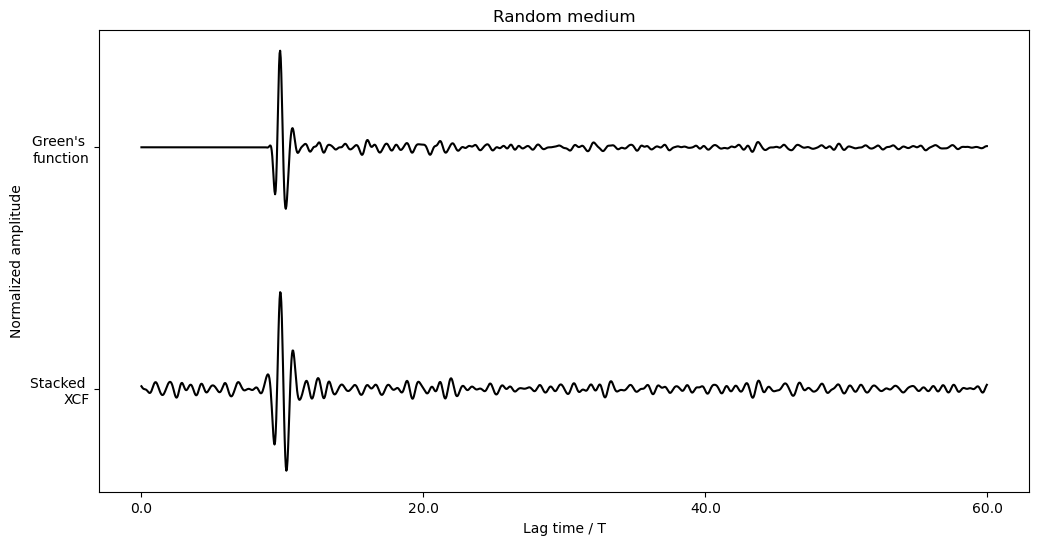

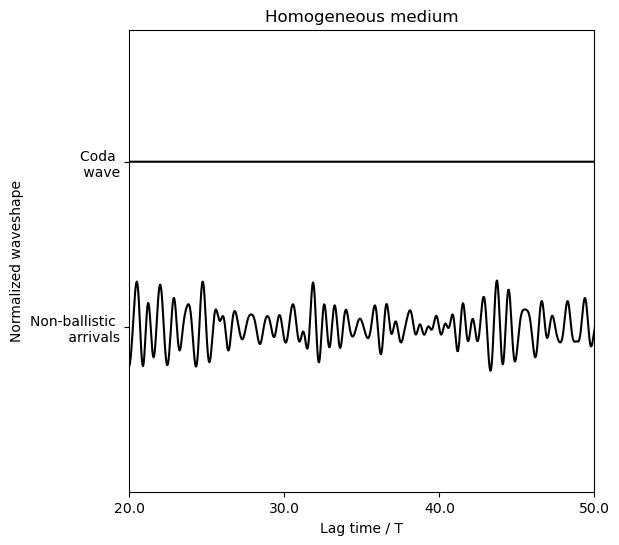

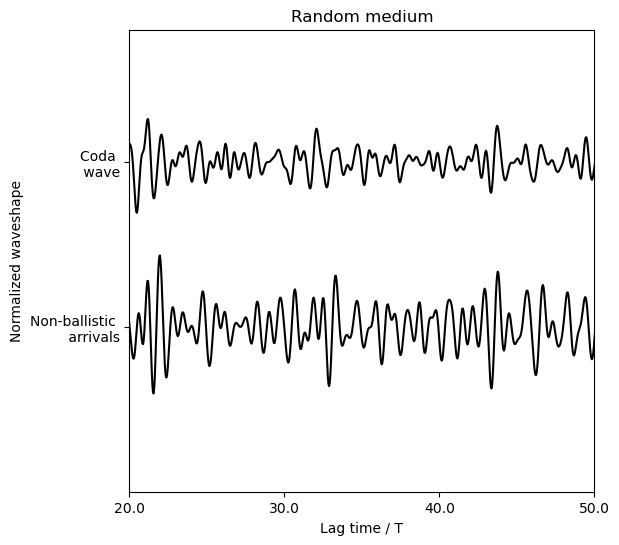

In [8]:
# For figure 10
sArB = np.fromfile(foldername+'sArB.dat', dtype=np.float32); sArB.shape=(Nmodel, nt) # Input Green's function
Gplot = np.zeros([Nmodel, 2, int(nt/2)])
for iv in range(0, Nmodel):
    Gplot[iv,0,:] = sArB[iv,30:1530]/np.max(sArB[iv,30:1530])              # 30 : time delay for source wavelet
    Gplot[iv,1,:] = auto_allAB[iv,0:1500]/np.max(auto_allAB[iv,0:1500]) 

fig_size = (12, 6)
fontsz = 14
ypos=np.arange(0,int(nt/2+1));yaxis = (np.arange(nt/2+1)*0.002)*20

for iv in (0,3):
    f, ax = plt.subplots(1,1, figsize=fig_size)
    for ip in (0,1):
        ax.plot(Gplot[iv,ip]-ip*2.5,'k')

    ax.set_xticks(ypos[0:int(nt/2+1):int(nt/6)], labels=yaxis[0:int(nt/2+1):int(nt/6)])
    ax.set_yticks([0,-2.5], labels=['Green\'s \nfunction','Stacked \nXCF'])
    ax.set_ylabel('Normalized amplitude');ax.set_xlabel('Lag time / T')
    ax.set_title(TT[iv])

fig_size = (6, 6)
fontsz = 14
ypos=np.arange(0,int(nt/2+1));yaxis = (np.arange(nt/2+1)*0.002)*20

for iv in (0,3):
    f, ax = plt.subplots(1,1, figsize=fig_size)
    for ip in (0, 1):
        print(iv,ip)
        ax.plot(Gplot[iv,ip]*10-ip*2.5,'k')

    ax.set_xticks(ypos[0:int(nt/2+1):int(nt/12)], labels=yaxis[0:int(nt/2+1):int(nt/12)])
    ax.set_yticks([0,-2.5], labels=['Coda \n wave','Non-ballistic \n arrivals'])
    ax.set_ylabel('Normalized waveshape');ax.set_xlabel('Lag time / T')
    ax.set_xlim([500,1250]);ax.set_ylim([-5,2])
    ax.set_title(TT[iv])

# Comparison between the actual Green’s function and the normalized XCFs at different stacking times

In [9]:
nauto     = int(autoc_len/2)
auto_staAB = np.zeros((4,nauto))
overlap_time = [0.05, 0.2, 0.8, 3.2]

overlap_len    = int(0.05/delta) 
nstack       = int(hour/0.05)


ifwhiten = 0
Nw_frac = 5
epsilon = 1e-10


for iv in range(0,4):
    ist=0
    for iit in range(0, nstack):
        
    #ntime stacks 
    # slice out the data within a short window
        endtime = autoc_winlen
        win_bgn = iit*overlap_len 
        win_end = win_bgn+autoc_len
        st_sliceA = randomnoiseA[3, win_bgn:min(win_end,endtime)]
        st_sliceB = randomnoiseB[3, win_bgn:min(win_end,endtime)]                 
        
        if endtime < win_end:
            break
             
    # perform FFT
        spA = np.fft.fft(st_sliceA)
        spB = np.fft.fft(st_sliceB)
                
    # spectral whitening, if required
        if ifwhiten == 1:
            ampA = np.abs(spA)
            ampB = np.abs(spB)
            Nw = int((autoc_len)/Nw_frac)
            amp_smA = np.convolve(ampA, np.ones(Nw)/Nw, mode='same')
            amp_smB = np.convolve(ampB, np.ones(Nw)/Nw, mode='same')
            spA = spA / (amp_smA + epsilon*max(amp_smA))
            spB = spB / (amp_smB + epsilon*max(amp_smB))
                
    # calculate autocorrelation fun in freq domain
        auto_funfAB = (spA*np.conj(spB)) 
        auto_funtAB = np.fft.ifft(auto_funfAB)
        tempAB = auto_funtAB.real[0: nauto]
        tempAB = tempAB / max(tempAB)
        auto_staAB[iv] = auto_staAB[iv] +tempAB

        
    auto_staAB[iv] = auto_staAB[iv]/(iit+1)
    print(nstack)
    nstack = int(nstack/4)
    

144000
36000
9000
2250


Text(0.5, 1.0, 'XCFs for random media')

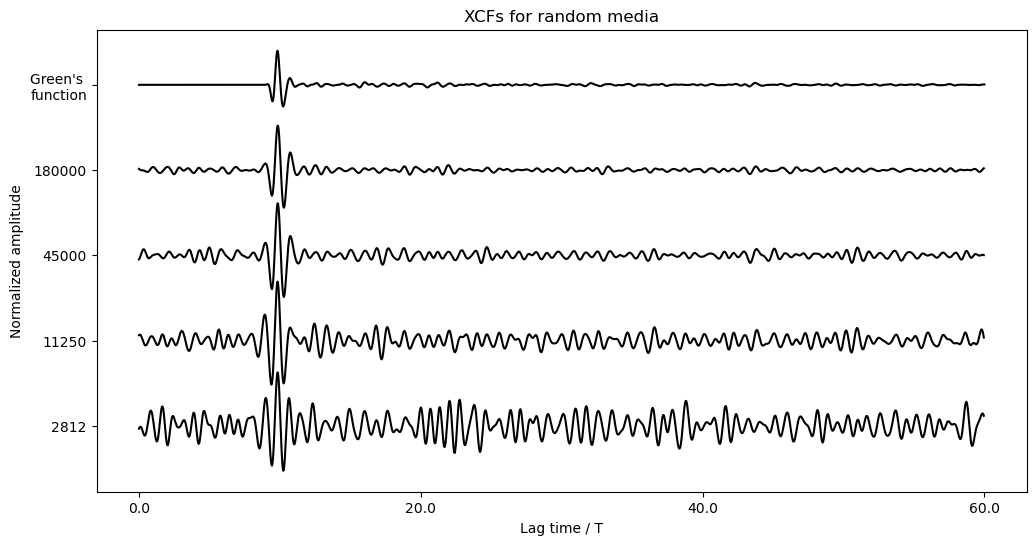

In [10]:
# Comparison between the actual Green’s function and the normalized XCFs after different stacks : figure 9(b)
fig_size = (12, 6)
fontsz = 14
ypos=np.arange(0,int(nt/2+1));yaxis = np.arange(nt/2+1)*0.002*20

f, ax = plt.subplots(1,1, figsize=fig_size)
wavelet_delay=30
ax.plot(sArB[3,wavelet_delay:int(nt/2+1)+wavelet_delay]/max(sArB[3,wavelet_delay:int(nt/2+1)+wavelet_delay]),'k')
for iv in range(0,4):
    ax.plot(auto_staAB[iv]*5-(iv+1)*2.5,'k')

ax.set_xticks(ypos[0:int(nt/2+1):int(nt/6)], labels=yaxis[0:int(nt/2+1):int(nt/6)])
ax.set_yticks([0,-2.5,-5,-7.5,-10], labels=['Green\'s \nfunction','180000','45000','11250','2812'])
ax.set_ylabel('Normalized amplitude');ax.set_xlabel('Lag time / T')
ax.set_title('XCFs for random media')